## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
#Seu Código aqui....

dados = pd.read_csv('aptos.csv') # Estamos carregando o arquivo csv usando o ; como separado

dados.head(15)


,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metros     100 non-null    int64 
 1   valor      100 non-null    int64 
 2   quartos    100 non-null    int64 
 3   vagas      100 non-null    int64 
 4   reformado  100 non-null    int64 
 5   bairro     100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- Metros: Corresponde a metragem dos Aptos.
- Valor: Corresponde o valor do Apto.
- Quartos: Corresponde a quantidade quartos que possuem os Aptos.
- Vagas: Corresponde a quantidade vagas de garagem que possuem os Aptos.
- Reformado: Corresponde a quantidade de apartamentos que foram reformados, on de 1 significa que foi e 0 não foi reformado.
- Bairro: Bairro onde fica localizado o apartamento.


**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1. Achamos que um primeiro cenário seria Valor do Apartamento e sua localização (Bairro); 
2. No segundo cenário seria a metragem (metros) e o valor do apartamento (valor);

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [5]:
#Seu Código aqui...
import statistics

dados1 = dados.drop(columns=['metros', 'quartos', 'vagas', 'reformado'])
dados2=dados1.dropna()

In [6]:
dados2

,valor,bairro
0,560,Vila Lusitania
1,555,Vila Lusitania
2,196,Ferrazopolis
3,515,Centro
4,560,Vila Lusitania
...,...,...
95,422,Baeta Neves
96,659,Rudge Ramos
97,200,Iraja
98,220,Santa Teresinha


In [7]:
dados2.groupby('bairro').mean()

,valor
bairro,
Assuncao,259.000000
Baeta Neves,511.133333
Centro,479.862069
Demarchi,229.400000
Ferrazopolis,204.000000
Independencia,359.000000
Iraja,197.500000
Jardim do Mar,807.500000
Jordanopolis,245.000000


In [8]:
dados3 = dados.drop(columns=['bairro', 'quartos', 'vagas', 'reformado'])
dados4=dados3.dropna()
media_metros = dados4.groupby('metros').mean()
print(media_metros)

dados4.groupby('metros').mean()

             valor
metros            
43      300.000000
45      215.000000
48      217.000000
49      196.000000
50      210.400000
51      249.000000
52      272.000000
53      261.000000
54      258.500000
55      244.400000
56      242.000000
57      238.500000
58      197.500000
60      360.000000
62      275.000000
64      286.333333
65      320.000000
67      250.000000
68      300.000000
70      338.666667
71      322.666667
73      365.000000
74      259.000000
77      390.000000
80      399.800000
81      485.000000
84      509.000000
85      580.000000
86      460.000000
88      520.000000
90      480.000000
91      545.000000
92      560.000000
93      465.166667
94      515.000000
100     504.800000
104     480.000000
105     659.000000
106     611.500000
107     545.000000
113     525.000000
116     750.000000
130     875.000000
140     635.000000
147     798.000000
150     807.500000
199     880.000000


,valor
metros,
43,300.000000
45,215.000000
48,217.000000
49,196.000000
50,210.400000
51,249.000000
52,272.000000
53,261.000000
54,258.500000


In [9]:
dados1 = dados.drop(columns=['metros', 'quartos', 'vagas', 'reformado'])
dados2=dados1.dropna()

In [10]:
media_bairro =dados2.groupby('bairro').mean()
print(media_bairro)

                      valor
bairro                     
Assuncao         259.000000
Baeta Neves      511.133333
Centro           479.862069
Demarchi         229.400000
Ferrazopolis     204.000000
Independencia    359.000000
Iraja            197.500000
Jardim do Mar    807.500000
Jordanopolis     245.000000
Nova Petropolis  450.000000
Pauliceia        230.000000
Piraporinha      367.000000
Planalto         261.250000
Rudge Ramos      375.875000
Santa Teresinha  210.000000
Taboao           261.000000
Vila Lusitania   564.166667


<AxesSubplot:xlabel='bairro', ylabel='valor'>

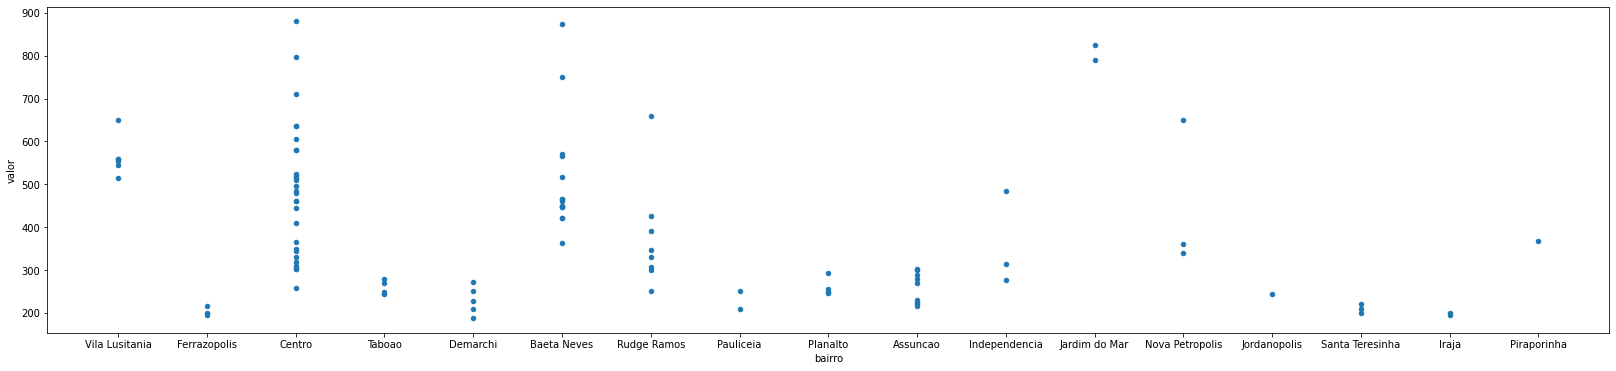

In [11]:
dados.plot.scatter('bairro', 'valor',figsize=(28,6)) #variação de preço por bairro


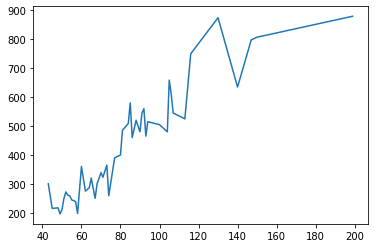

In [24]:
import matplotlib.pyplot as plt

plt.plot(media_metros) #média de preço por tamanho do imóvel
plt.show()

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado
    
    Porque envolve o aprendizado de uma “função” a partir de exemplos de entrada e saída, fornecidos por um tutor(especialista).

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo: R2
2. algoritimo: MAE

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo. **O R2 é utilizado para verificar se a regressão produz uma curva que segue bem os dados. Quanto mais próximo de 1, melhor o resultado.**
2. algoritimo ...**O MAE calcula o valor dos resíduos para cada um dos pontos e depois é tirado a média de todos esses resíduos.** 

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [26]:
#Conjunto de treinamento do Algoritmo 1.

x=dados.drop(columns = ['quartos', 'reformado', 'vagas', 'bairro', 'valor'])
y=dados['valor']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size  = 0.20, random_state = 42)

In [27]:
#Conjunto de treinamento do Algoritmo 1.

dados5 = dados

In [28]:
a=dados5.drop(columns = ['quartos', 'reformado', 'vagas', 'bairro', 'metros'])
b=dados5['quartos']
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size  = 0.20, random_state = 42)

### Algoritmo 1

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 

lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_predicoes = lr.predict(x_test)

In [31]:
R2 = r2_score(y_true = y_test,      
              y_pred = y_predicoes) 
print('R2: ', R2)

R2:  0.8291553999252744


### Algoritmo 2

In [32]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression() 

lr1.fit(a_train,b_train)


LinearRegression()

In [33]:
y_predicoes1 = lr1.predict(a_test)

In [34]:
MAE = mean_absolute_error(y_true = b_test,      # Gabarito
                          y_pred = y_predicoes1) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  0.3040994809180808


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | valor | valor |
| teste  | metros | quartos |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O algoritmo 1 teve melhor resultado, pois foi o que mais se aproximou de 1.0.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [35]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(x_train, y_train)


LinearRegression()

In [36]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(x_test)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))


Predição usando regressão, retorna valores continuos: [269.36329254 472.7374868  297.60970841 258.0647262  263.71400937
 427.54322141 314.55755793 433.19250458 512.28246901 551.82745123
 399.29680554 777.79877818 218.51974398 348.45325698 444.49107093
 467.08820363 342.8039738  314.55755793 314.55755793 365.4011065 ]


Text(0, 0.5, 'Valor Predito')

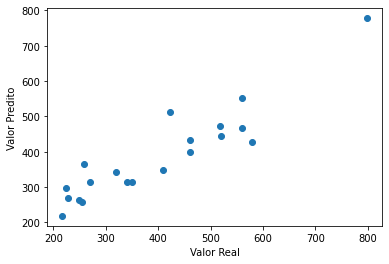

In [37]:
plt.scatter(y_test,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

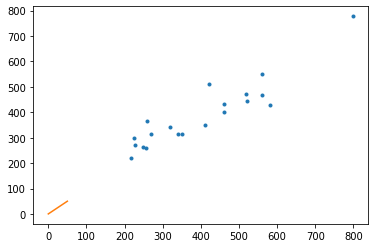

In [38]:
# plot prediction and actual data
y_teste_predito = lin_model.predict(x_test)

plt.plot(y_test, y_teste_predito, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y)
plt.show()

In [39]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): " % np.sum((y_teste_predito - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , y_test) )

Soma dos Erros ao Quadrado (SSE): 
Erro Quadrático Médio (MSE): 3975.75
Erro Médio Absoluto (MAE): 50.19
Raiz do Erro Quadrático Médio (RMSE): 63.05 
R2-score: 0.75


## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Não muito, não foi possivel fazer previsões precisas

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Melhor analise de dados
